            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
1981-01-06  15.8
1981-01-07  15.8
1981-01-08  17.4
1981-01-09  21.8
1981-01-10  20.0
1981-01-11  16.2
1981-01-12  13.3
1981-01-13  16.7
1981-01-14  21.5
1981-01-15  25.0
1981-01-16  20.7
1981-01-17  20.6
1981-01-18  24.8
1981-01-19  17.7
1981-01-20  15.5


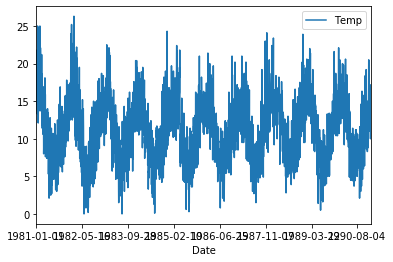

In [6]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
# load dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
# display first few rows
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

In [7]:
# split the dataset
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset_dt.csv', index=False)
validation.to_csv('validation_dt.csv', index=False)

Dataset 3643, Validation 7


In [8]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

In [9]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [10]:
from statsmodels.tsa.arima_model import ARIMA
import numpy
# load dataset
series = read_csv('dataset_dt.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

TypeError: unsupported operand type(s) for -: 'str' and 'str'